In [1]:
#!pip install sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

%matplotlib inline

In [2]:
df = pd.read_csv('unclean_data.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [4]:
df = df.dropna(how="all")

In [5]:
df=df.reset_index(drop=True)

In [6]:
df

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


In [7]:
df['price']=df['price'].str.replace(',','').str.replace('£','')
df['price']=pd.to_numeric(df['price'],errors='coerce')

In [8]:
df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [9]:
df.rename(columns={'fuel type':'fuel_type', 'fuel type2':'fuel_type2',
                   'engine size':'engine_size', 'engine size2':'engine_size2'}, inplace=True)
df.head()

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [10]:
df['fuel_type2']=df.fuel_type2.fillna(df.fuel_type)
df.head()

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",Diesel,NaN,/ad/24913660


In [11]:
df=df.drop(columns=['fuel_type'])
df.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,2,"4,500",Diesel,NaN,/ad/24913660


In [12]:
df.rename(columns={'fuel_type2':'fuel_type'},inplace=True)
df.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,2,"4,500",Diesel,NaN,/ad/24913660


In [13]:
df['mileage']=df.mileage.fillna(df.mileage2)
df.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,"1,200",2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,"1,000",1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,"5,000",2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,"4,500",2,"4,500",Diesel,NaN,/ad/24913660


In [14]:
df['mileage']=df['mileage'].astype(str)

In [15]:
df['mileage']=df['mileage'].str.replace(',','')
df.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500,2,"4,500",Diesel,NaN,/ad/24913660


In [16]:
df['mileage']=pd.to_numeric(df['mileage'],errors='coerce')
df.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,"4,500",Diesel,NaN,/ad/24913660


In [17]:
df=df.drop(columns=['mileage2'])
df

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,31357.0,£150,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,18500,Automatic,28248.0,£150,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,11900,Manual,48055.0,£20,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,11300,Automatic,49865.0,£145,Diesel,2.143,/ad/25144481


In [18]:
df['engine_size2']=df.engine_size2.fillna(df.engine_size)
df.head()

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,2,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,2,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,2,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,2,/ad/24913660


In [19]:
df['engine_size2']=pd.to_numeric(df['engine_size2'],errors='coerce')
df.head()

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,2.0,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,2.0,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,2.0,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,2.0,/ad/24913660


In [20]:
df['engine_size2']=df['engine_size2'].apply(lambda x:round(x/1000,1) if x>1000 else round(x,1))
df.head()

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,2.0,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,2.0,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,2.0,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,2.0,/ad/24913660


In [21]:
df=df.drop(columns=['engine_size'])
df.rename(columns={'engine_size2':'engine_size'}, inplace=True)
df

,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020.0,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660
...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,31357.0,Diesel,1.6,/ad/25451436
3903,C Class,2018.0,18500,Automatic,28248.0,Diesel,2.1,/ad/25451481
3904,C Class,2014.0,11900,Manual,48055.0,Diesel,2.1,/ad/25057204
3905,C Class,2014.0,11300,Automatic,49865.0,Diesel,2.1,/ad/25144481


In [22]:
df.describe()

,year,price,mileage,engine_size
count,3904.000000,3907.000000,3903.000000,3905.000000
mean,2017.341189,23686.112106,22392.446836,2.036773
std,2.213643,8966.554960,22620.937093,0.487497
min,1991.000000,1290.000000,1.000000,0.000000
25%,2016.000000,17692.500000,6000.000000,2.000000
50%,2018.000000,22980.000000,14642.000000,2.000000
75%,2019.000000,28900.000000,32458.500000,2.100000
max,2020.000000,88995.000000,173000.000000,6.200000


In [23]:
df[df['engine_size'].isna()]

,model,year,price,transmission,mileage,fuel_type,engine_size,reference
3429,C Class,2017.0,19995,Automatic,8020.0,Petrol,NaN,/ad/24843317
3616,C Class,2005.0,2495,Automatic,110461.0,Diesel,NaN,/ad/24542756


In [24]:
df=df.dropna(how='any')
df=df.reset_index(drop=True)
df[df['engine_size'].isna()]

,model,year,price,transmission,mileage,fuel_type,engine_size,reference


In [25]:
df['year']=df['year'].astype('int64')
df.head()

,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660


In [26]:
df=df.drop(columns=['model','reference'])
df.head()

,year,price,transmission,mileage,fuel_type,engine_size
0,2020,30495,Automatic,1200.0,Diesel,2.0
1,2020,29989,Automatic,1000.0,Petrol,1.5
2,2020,37899,Automatic,500.0,Diesel,2.0
3,2019,30399,Automatic,5000.0,Diesel,2.0
4,2019,29899,Automatic,4500.0,Diesel,2.0


In [27]:
dumTransmission=pd.get_dummies(df['transmission'])
dumTransmission

,Automatic,Manual,Other,Semi-Auto
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
3893,0,1,0,0
3894,1,0,0,0
3895,0,1,0,0
3896,1,0,0,0


In [28]:
df=df.join(dumTransmission)

In [29]:
df

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,Other,Semi-Auto
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3893,2017,14700,Manual,31357.0,Diesel,1.6,0,1,0,0
3894,2018,18500,Automatic,28248.0,Diesel,2.1,1,0,0,0
3895,2014,11900,Manual,48055.0,Diesel,2.1,0,1,0,0
3896,2014,11300,Automatic,49865.0,Diesel,2.1,1,0,0,0


In [30]:
dumFueltype=pd.get_dummies(df['fuel_type'])
dumFueltype

,Diesel,Hybrid,Other,Petrol
0,1,0,0,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
3893,1,0,0,0
3894,1,0,0,0
3895,1,0,0,0
3896,1,0,0,0


In [31]:
dumFueltype.rename(columns={'Other':'OtherFuelType'}, inplace=True)

In [32]:
df=df.join(dumFueltype)

In [33]:
df

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuelType,Petrol
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0,0,0,0,1
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2017,14700,Manual,31357.0,Diesel,1.6,0,1,0,0,1,0,0,0
3894,2018,18500,Automatic,28248.0,Diesel,2.1,1,0,0,0,1,0,0,0
3895,2014,11900,Manual,48055.0,Diesel,2.1,0,1,0,0,1,0,0,0
3896,2014,11300,Automatic,49865.0,Diesel,2.1,1,0,0,0,1,0,0,0


In [34]:
df.drop(columns=['transmission','fuel_type'],inplace=True)
df.head()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuelType,Petrol
0,2020,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500.0,2.0,1,0,0,0,1,0,0,0


In [35]:
df.to_csv('my_cleaned_data.csv')

# Start EDA Below

# Starting feature observation and analysis

In [37]:
df.describe()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuelType,Petrol
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,2017.341714,23679.720369,22373.116727,2.036762,0.417394,0.051052,0.000257,0.531298,0.600051,0.038738,0.001539,0.359672
std,2.204856,8954.941562,22589.323398,0.487930,0.493192,0.220132,0.016017,0.499083,0.489950,0.192994,0.039208,0.479966
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17691.250000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14638.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32440.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# df.corr()

In [39]:
# df.drop(df.loc[df["price"]>(df['price'].mean()*3*df['price'].std())].index, inplace=True)
# df.drop(df.loc[df["price"]<(df['price'].mean()*3*-1*df['price'].std())].index, inplace=True)
df.drop(df.loc[df["mileage"]>(df['mileage'].mean()*3*df['mileage'].std())].index, inplace=True)
df.drop(df.loc[df["mileage"]<(df['mileage'].mean()*3*-1*df['mileage'].std())].index, inplace=True)
df.drop(df.loc[df["price"]<5000].index, inplace=True)
df.drop(df.loc[df["price"]>50000].index, inplace=True)

In [40]:
# sns.pairplot(df, height=2.5)
# plt.tight_layout()

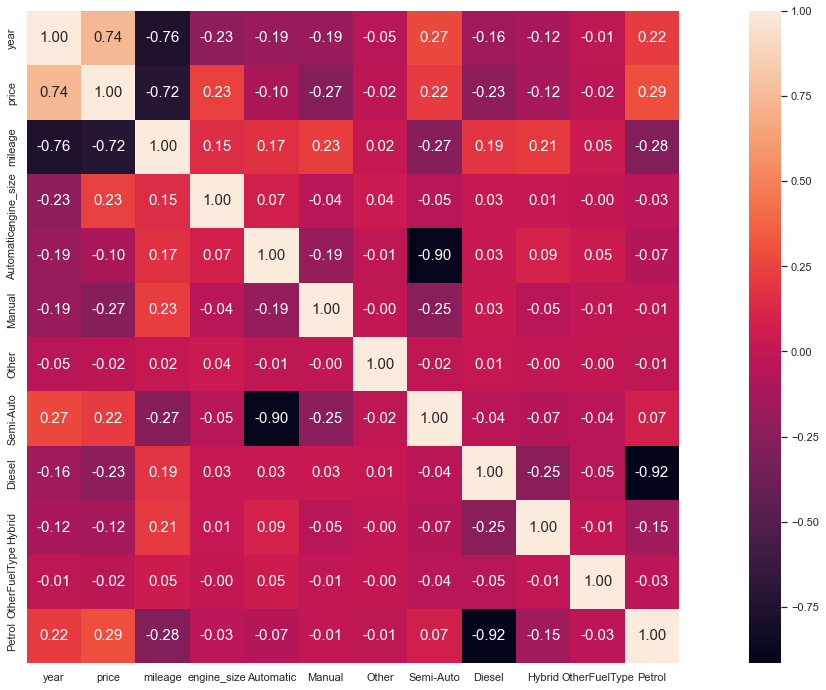

In [41]:
import seaborn as sns
%matplotlib inline

cm = np.corrcoef(df.values.T)
sns.set(font_scale=1.5)
sns.set(rc = {'figure.figsize':(25,12)})
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot = True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={"size":15}, 
                 yticklabels=df.columns,
                 xticklabels=df.columns)

## Split the dataset into training and test sets
We will split 75:25 and using randomstate=42 to make a repeatable result. 


In [42]:
response = df['price']
features = df[['year', 'mileage', 'engine_size', 'Manual', 'Semi-Auto','Diesel','Petrol']]
# features = df.drop('price', axis=1)

In [43]:

X_train, X_test, Y_train, Y_test = train_test_split(features, 
                                                    response, 
                                                    test_size=0.25,  
                                                    random_state=42)

print("Training and testing split was successful")

Training and testing split was successful


# Training and Testing

In [44]:

# build the model
# Step 1 import the libraries

# Step 2 call the linear regression model
model = LinearRegression()
# Step 3 create the model
model.fit(X_train, Y_train)
print(model)

LinearRegression()


In [45]:
# get the predictions for the test dataset
predictions = model.predict(X_test)

## Evaluate the model performance

In [46]:
# R-squared
print("R^2 in training dataset: ", round(model.score(X_train, Y_train),3))
print("R^2 in testing dataset: ", round(model.score(X_test, Y_test),3))

R^2 in training dataset:  0.779
R^2 in testing dataset:  0.789


In [47]:
# RMSE

# Now finding the mean squared error
mse = mean_squared_error(Y_test, predictions)

print('RMSE in Test set: ',mse**0.5)

RMSE in Test set:  3539.2005733502237


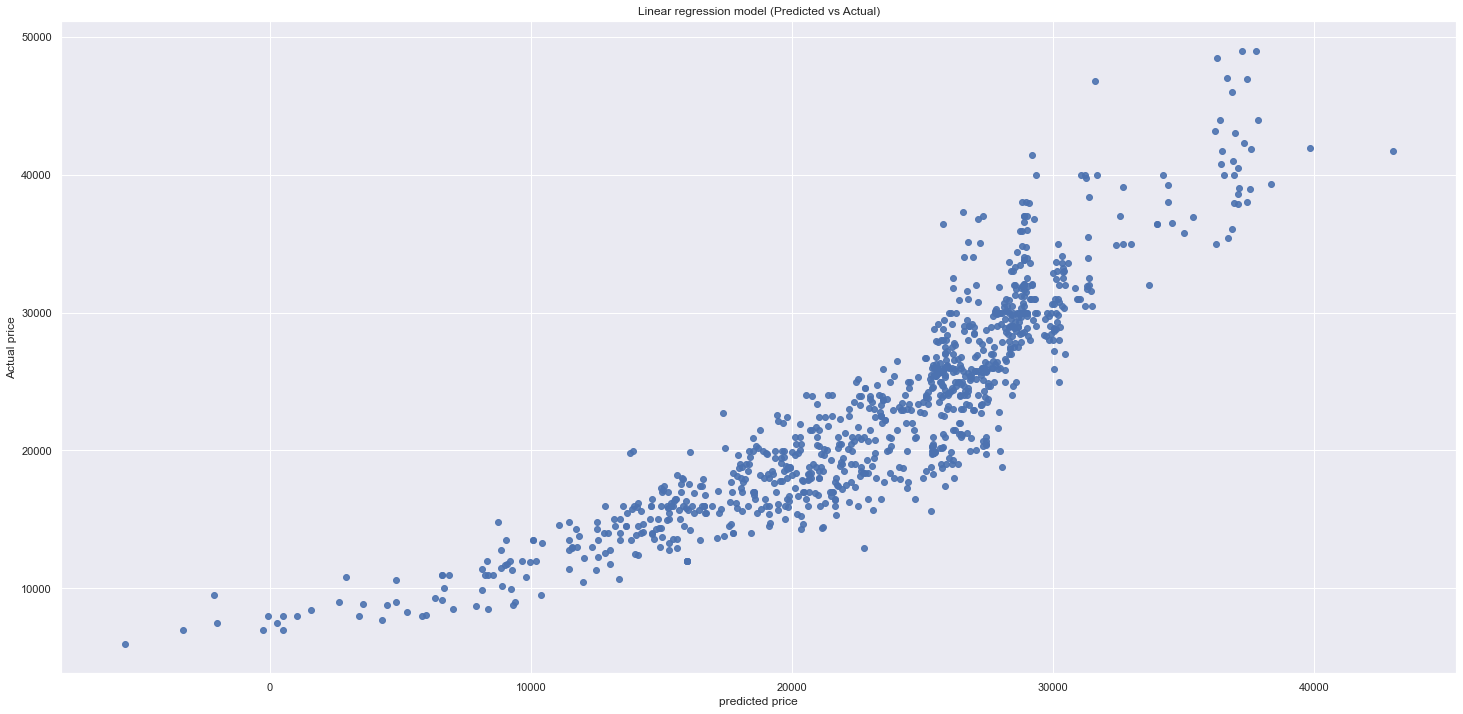

In [48]:
# plot the prediction vs actual
actual_values = Y_test
plt.scatter(predictions, actual_values, alpha=0.9, color='b')
plt.xlabel("predicted price")
plt.ylabel("Actual price")
plt.title("Linear regression model (Predicted vs Actual)")
plt.show()

In [49]:
# the coefficient list
feat = list(X_train.columns)
coef = model.coef_.transpose()

coef_table = np.vstack((feat, coef)).T
new_df = pd.DataFrame(coef_table, columns=["Features", "Coeffficients"])
print(new_df)

      Features         Coeffficients
0         year     2339.441008897831
1      mileage  -0.11575087319817555
2  engine_size     6850.367236803332
3       Manual   -2751.0786891418575
4    Semi-Auto   -276.99018552790585
5       Diesel    -751.8814724125913
6       Petrol     697.9529923822753
